## 🌟 What is Dow Theory?

**Dow Theory** is a framework for understanding and predicting stock market trends. It was developed from the writings of **Charles H. Dow**, the founder of the *Wall Street Journal* and co-founder of the Dow Jones & Company.

While he never formally wrote "Dow Theory," his ideas were compiled later by others like William Hamilton and Robert Rhea.

## 📚 6 Core Tenets of Dow Theory

Here are the six basic principles of Dow Theory:

### 1. **The Market Discounts Everything**

This means that **all known information** — economic data, news, interest rates, and even human emotions — is already reflected in the market prices.
So, **price is the ultimate truth**.

Example: If a company is expected to perform well, investors start buying early, and its stock price rises *before* profits actually increase.

---

### 2. **There Are Three Types of Market Trends**

Dow Theory says markets move in **three trend types**, like waves in the ocean:

#### a. **Primary Trend (Major tide)**

* Lasts for months or years.
* It's the **main direction** — bull market (uptrend) or bear market (downtrend).

#### b. **Secondary Trend (Waves)**

* Corrections within the primary trend.
* Lasts weeks or months.
* In a bull market, it’s a temporary drop. In a bear market, it’s a temporary rise.

#### c. **Minor Trend (Ripples)**

* Lasts days or weeks.
* Short-term fluctuations due to news, speculation, or emotion.

> 🎯 As an investor, your main focus should be the **primary trend**.

---

### 3. **Primary Trends Have Three Phases**

When a major trend (bull or bear) begins, it doesn't happen all at once. It goes through **3 phases**:

#### Bull Market (Uptrend):

1. **Accumulation Phase**: Smart investors start buying quietly.
2. **Public Participation Phase**: General public notices and joins in.
3. **Excess Phase**: Market gets overly optimistic (FOMO), prices skyrocket.

#### Bear Market (Downtrend):

1. **Distribution Phase**: Smart investors begin to sell.
2. **Public Participation Phase**: Everyone starts selling, prices drop fast.
3. **Panic Phase**: Fear dominates, people sell at any price.

---

### 4. **The Averages Must Confirm Each Other**

Originally, Dow looked at **two indexes**:

* **Dow Jones Industrial Average (DJIA)**: Represents production.
* **Dow Jones Transportation Average (DJTA)**: Represents delivery/logistics.

Dow said:

> If one index is rising, but the other is falling, it's not a strong trend.

> ✅ A trend is confirmed when **both indexes move in the same direction.**

🧠 *Modern interpretation:* Use multiple sector indexes (tech, banking, etc.) to confirm trends.

---

### 5. **Volume Confirms the Trend**

Volume = number of shares traded.

* **In a true uptrend**, volume increases on up days and decreases on down days.
* **In a true downtrend**, volume increases on down days and decreases on up days.

> 📌 If price rises but volume is low, the trend may be weak or fake.

---

### 6. **A Trend Remains in Effect Until It Gives a Clear Reversal Signal**

Dow believed trends remain intact until there's **clear evidence** they’ve reversed.

> ⚠️ Don’t assume a trend has changed just because of a small correction.

**Confirmation** and **patterns** (like support/resistance breaks) help identify true reversals.

---

## 🧠 Why Should You Learn Dow Theory?

* It helps you understand **market psychology**.
* It lays the foundation for **technical analysis** like trendlines, moving averages, and chart patterns.
* It helps in deciding **when to enter and exit** the market.

## Python Script for Basic Dow Theory Analysis

### 🔧 Install required libraries:

```bash
pip install yfinance pandas matplotlib
```

### 📄 Python Code:

```python
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Get historical stock data
ticker = 'RELIANCE.NS'  # Reliance Industries on NSE
df = yf.download(ticker, start="2020-01-01", end="2025-01-01")
df = df[['Close', 'Volume']]

# Step 2: Identify Highs and Lows (very basic version)
df['Previous Close'] = df['Close'].shift(1)
df['Trend'] = 'Sideways'

# Simple logic: if today > yesterday -> up, else down
df.loc[df['Close'] > df['Previous Close'], 'Trend'] = 'Up'
df.loc[df['Close'] < df['Previous Close'], 'Trend'] = 'Down'

# Step 3: Plot Price and Volume
plt.figure(figsize=(14, 7))

# Price Chart
plt.subplot(2, 1, 1)
plt.plot(df['Close'], label='Close Price', color='blue')
plt.title(f'{ticker} - Close Price')
plt.legend()

# Volume Chart
plt.subplot(2, 1, 2)
plt.bar(df.index, df['Volume'], color='gray')
plt.title('Trading Volume')
plt.tight_layout()
plt.show()
```

## 🔍 What This Script Does:

* Downloads Reliance stock data.
* Adds a simple up/down trend column (for educational purposes).
* Plots the closing price and volume.

Run the following **enhanced Dow Theory analysis script on your local machine**. It includes:

* ✅ Higher Highs & Higher Lows detection
* ✅ Volume confirmation
* ✅ Breakout detection
* ✅ Trend phase classification (Accumulation, Public Participation, Excess)

---

## 📦 Step 1: Install the Required Libraries

Open your terminal and run:

```bash
pip install yfinance pandas matplotlib
```

---

## 🧠 Step 2: Paste and Run This Python Script

```python
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download data
ticker = 'RELIANCE.NS'
df = yf.download(ticker, start="2020-01-01", end="2025-01-01")
df = df[['Close', 'Volume']]
df.dropna(inplace=True)

# Calculate rolling highs and lows
df['High'] = df['Close'].rolling(window=5).max()
df['Low'] = df['Close'].rolling(window=5).min()

# Higher Highs and Higher Lows
df['HH'] = df['High'] > df['High'].shift(1)
df['HL'] = df['Low'] > df['Low'].shift(1)

# Volume confirmation logic
df['UpMove'] = df['Close'] > df['Close'].shift(1)
df['VolumeUpConfirm'] = df['UpMove'] & (df['Volume'] > df['Volume'].shift(1))

# Breakout detection (price > previous high)
df['Breakout'] = df['Close'] > df['High'].shift(1)

# Trend phase detection
def detect_phase(row):
    if row['HH'] and row['HL'] and row['VolumeUpConfirm']:
        return 'Public Participation'
    elif not row['HH'] and not row['HL']:
        return 'Accumulation'
    elif row['Breakout']:
        return 'Excess'
    else:
        return 'Unclear'

df['Trend_Phase'] = df.apply(detect_phase, axis=1)

# Assign colors for visualization
color_map = {
    'Accumulation': 'orange',
    'Public Participation': 'green',
    'Excess': 'red',
    'Unclear': 'gray'
}
df['Color'] = df['Trend_Phase'].map(color_map)

# Plotting
plt.figure(figsize=(15, 10))

# 1. Close Price Plot with Breakouts
plt.subplot(3, 1, 1)
plt.plot(df['Close'], label='Close Price', color='blue')
plt.scatter(df.index[df['Breakout']], df['Close'][df['Breakout']], color='green', marker='^', label='Breakout')
plt.title(f"{ticker} - Price with Breakouts")
plt.legend()

# 2. Volume Plot
plt.subplot(3, 1, 2)
plt.bar(df.index, df['Volume'], color='gray')
plt.title('Trading Volume')

# 3. Trend Phase Visualization
plt.subplot(3, 1, 3)
plt.scatter(df.index, df['Close'], color=df['Color'], s=10)
plt.title('Trend Phase (Dow Theory)')
plt.tight_layout()

plt.show()

# Optional: Print last few rows to inspect
print(df[['Close', 'HH', 'HL', 'VolumeUpConfirm', 'Breakout', 'Trend_Phase']].tail(10))
```


## What You’ll See

* A chart showing:

  * Price with breakout points (green arrows)
  * Volume bars
  * Color-coded phases (Accumulation = orange, Public = green, Excess = red)
* A terminal output with recent trend phase data


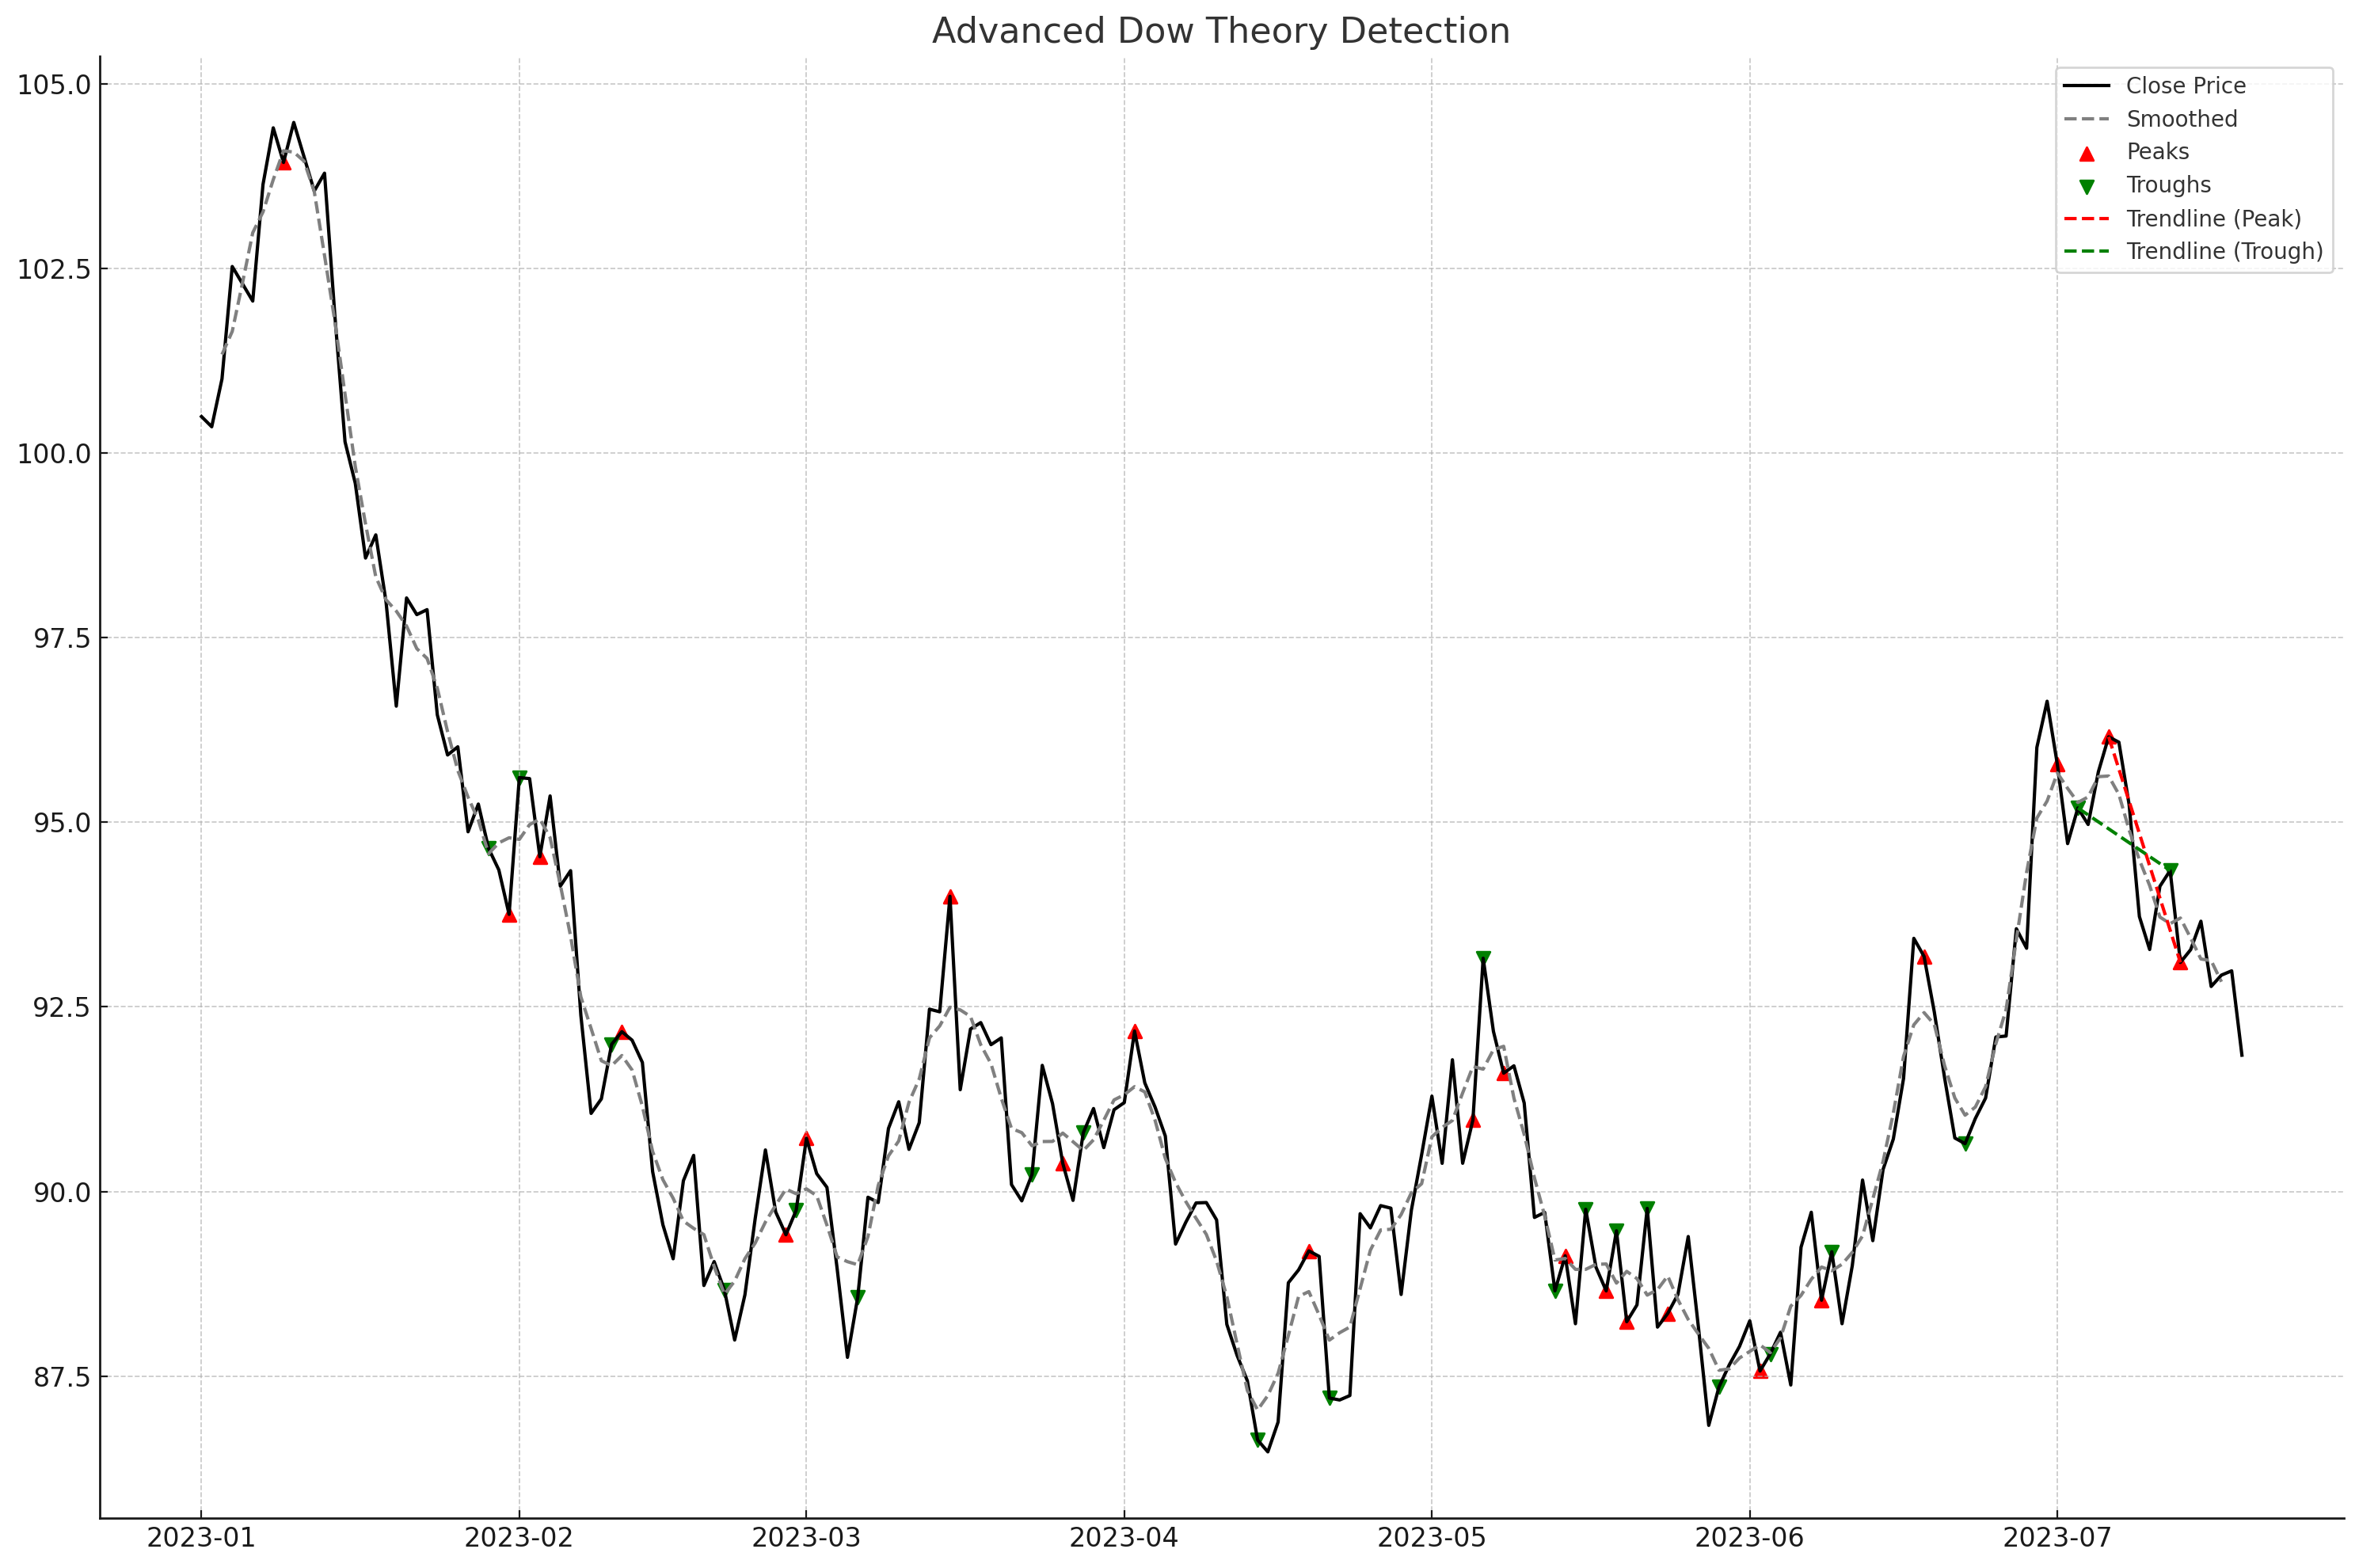


### ✅ **Key Features Implemented**

1. **📈 Peak and Trough Identification**

   * Using smoothed prices to detect swing highs and lows.

2. **📏 Trendline Drawing**

   * Connects the last two peaks and troughs to visually identify uptrends/downtrends.

3. **📊 Volume Filters**

   * Marks if volume is rising compared to a 5-day average (a potential sign of strength or weakness).

4. **🕯️ Candlestick Approximation** *(Optional)*

   * Tags each day as **Bullish** or **Bearish** based on Open vs Close price.

---

### 🖼️ Visual Output Summary

* **Black Line**: Raw Close Price
* **Gray Dashed Line**: Smoothed Price (Rolling Avg)
* **Red Triangles**: Peaks (Higher Highs)
* **Green Inverted Triangles**: Troughs (Higher Lows)
* **Dashed Red Line**: Trendline from peaks
* **Dashed Green Line**: Trendline from troughs

---

### 📋 Sample Table Output (Last 10 Rows)

| Date       | Close | Peak | Trough | Rising Volume | Bullish | Bearish |
| ---------- | ----- | ---- | ------ | ------------- | ------- | ------- |
| 2023-07-12 | 94.34 | ❌    | ✅      | ✅             | ✅       | ❌       |
| 2023-07-13 | 93.10 | ✅    | ❌      | ❌             | ❌       | ✅       |
| 2023-07-14 | 93.28 | ❌    | ❌      | ✅             | ✅       | ❌       |
| ...        | ...   | ...  | ...    | ...           | ...     | ...     |
